<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part4/P4_Ch03_CH03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Dataset


tf.data.Dataset이용

## FashionMNIST data 불러오기

In [30]:
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Sneaker', 'Shirt', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
# train_images, train_labels shape확인

print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [32]:
# test_images, test_labels shape 확인

print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [33]:
type(train_images)

numpy.ndarray

In [34]:
# training set의 각 class별 image 수 확인
unique, counts = np.unique(train_labels, axis = -1, return_counts = True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [35]:
# test set의 각 class별 image 수 확인
unique, counts = np.unique(test_labels, axis = -1, return_counts = True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

## Data 시각화 하기


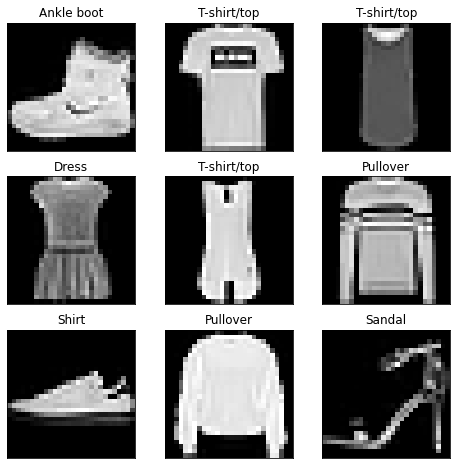

In [36]:
plt.figure(figsize = (8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_names[train_labels[i]])
plt.show()

## Data 전처리

In [37]:
#image를 0-1사이 값으로 만들기 위하여 255로 나누어줌
train_images = train_images.astype(np.float32)/ 255.
test_images = test_images.astype(np.float32)/255.

#one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [38]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Dataset 만들기


In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
    buffer_size = 100000).batch(64)
    # train을 shuffle하지 않으면 학습이 끝날때마다 같은 순서의 데이터들이 들어감
    # from_tensor_slices : 하나씩 가져오는거
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

In [42]:
for images, labels in train_dataset:
  print(labels)
  break
  

tf.Tensor(
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Feature batch shape:(64, 28, 28)
Labels batch shape: (64, 10)


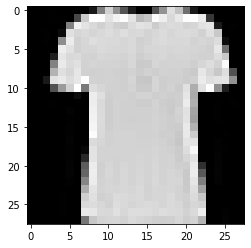

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [43]:
# Dataset을 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시합니다.

imgs, lbs = next(iter(train_dataset)) # 한개 빼내기
print(f'Feature batch shape:{imgs.shape}')
print(f'Labels batch shape: {lbs.shape}')

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f'Label: {lb}')

### Custom Dataset 만들기


In [53]:
a = np.arange(10)
print(a)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

for x in ds_tensors:
  print(x)


[0 1 2 3 4 5 6 7 8 9]
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [54]:
# data전처리(변환), shuffle, batch 추가
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2) # map : 모든데이터에 적용 , shuffle: 숫자가 데이터수 이상이면 완전셔플, 작으면 일부셔플, batch : 한번에 내보낼 데이터의 수
print(ds_tensors)

<BatchDataset element_spec=TensorSpec(shape=(None,), dtype=tf.int64, name=None)>


In [55]:
for _ in range(3): #Epoch
  for x in ds_tensors:
    print(x)
  print('='*50)

tf.Tensor([36 49], shape=(2,), dtype=int64)
tf.Tensor([9 1], shape=(2,), dtype=int64)
tf.Tensor([25 81], shape=(2,), dtype=int64)
tf.Tensor([16 64], shape=(2,), dtype=int64)
tf.Tensor([4 0], shape=(2,), dtype=int64)
tf.Tensor([64 25], shape=(2,), dtype=int64)
tf.Tensor([16  4], shape=(2,), dtype=int64)
tf.Tensor([81  9], shape=(2,), dtype=int64)
tf.Tensor([ 1 36], shape=(2,), dtype=int64)
tf.Tensor([ 0 49], shape=(2,), dtype=int64)
tf.Tensor([ 9 81], shape=(2,), dtype=int64)
tf.Tensor([16 64], shape=(2,), dtype=int64)
tf.Tensor([49 25], shape=(2,), dtype=int64)
tf.Tensor([ 1 36], shape=(2,), dtype=int64)
tf.Tensor([4 0], shape=(2,), dtype=int64)
